In [1]:
import numpy as np
import rasterio as rio
from whitebox.whitebox_tools import WhiteboxTools
import geopandas as gpd
import py3dep

import os

wbt = WhiteboxTools()

/tmp/ipykernel_3915672/4188049730.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
from pynhd import pynhd

huc12 = pynhd.WaterData("wbd12", crs="epsg:4326")


<AxesSubplot: >

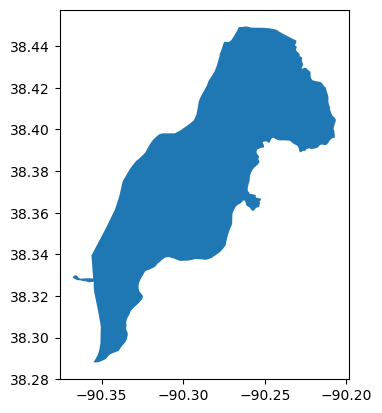

In [3]:
df = huc12.byid("huc12", '071401010703')
df.geometry.plot()

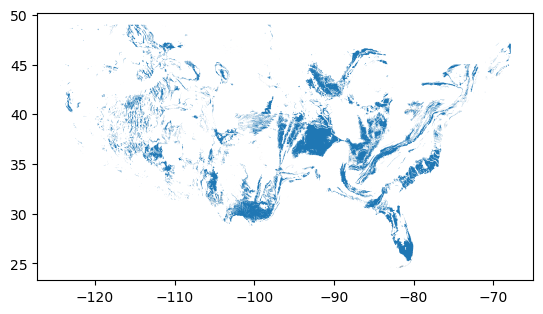

In [4]:
all_carbs = gpd.read_file('./USGS-Karst-Map/Dissolved_carbonates_seperate_polys_E_B3.shp')
all_carbs.plot()
all_carbs_dissolved = all_carbs.dissolve()

#carb_hucs = gpd.read_file('./huc12/huc12.shp', mask=all_carbs_dissolved)
#carb_hucs.plot()

,geometry,fid,KARST_TYPE,Climate,Induration,Exposure,ROCKTYPE1,ROCKTYPE2,ROCKTYPE3,UNIT_NAME,...,State,UNIT_LINK,URL,NA_L3NAME,NA_L3CODE,COMMENTS,Shape_Leng,Shape_Area,layer,path
0,"MULTIPOLYGON (((-118.97394 34.82099, -118.9740...",1.0,Carbonate rocks buried under =50 ft of glacial...,dry,Consolidated,B3,limestone,limestone,shale; clay or mud; sand,Niobrara Formation,...,SD,SDKn;0,http://mrdata.usgs.gov/geology/state/sgmc-unit...,Northwestern Glaciated Plains,9.3.1,None,2320.43139,121422.43149,Exposure_B3,/home/mcoving/tmp/Exposure_B3.gpkg|layername=E...


In [6]:
huc_geom = df.iloc[0].geometry

carb_huc = huc_geom.intersection(all_carbs_dissolved.iloc[0].geometry)

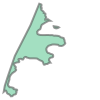

In [7]:
carb_huc

In [8]:
dem = py3dep.get_dem(carb_huc, 10)

In [11]:
dem.rio.to_raster('test_huc_dem.tif')

In [13]:
wbt.sink('/home/mcoving/github/sinkhole_analysis/test_huc_dem.tif', '/home/mcoving/github/sinkhole_analysis/test_huc_sinks.tif', zero_background=True)



./whitebox_tools --run="Sink" --input='/home/mcoving/github/sinkhole_analysis/test_huc_dem.tif' --output='/home/mcoving/github/sinkhole_analysis/test_huc_sinks.tif' --zero_background -v --compress_rasters=False

****************************
* Welcome to Sink          *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Finding pit cells: 4%
Finding pit cells: 8%
Finding pit cells: 12%
Finding pit cells: 16%
Finding pit cells: 20%
Finding pit cells: 25%
Finding pit cells: 29%
Finding pit cells: 33%
Finding pit cells: 37%
Finding pit cells: 41%
Finding pit cells: 45%
Finding pit cells: 50%
Finding pit cells: 54%
Finding pit cells: 58%
Finding pit cells: 62%
Finding pit cells: 66%
Finding pit cells: 70%
Finding pit cells: 75%
Finding pit cells: 79%
Finding pit cells: 83%
Finding pit cells: 87%
Finding pit cells: 91%
Finding pit cells: 95%
Finding pit cells: 100%
Finding depressions: 0%
Finding depressions: 1%
Finding depressions: 2%
Find

0

In [14]:
wbt.raster_to_vector_polygons('/home/mcoving/github/sinkhole_analysis/test_huc_sinks.tif',
                              '/home/mcoving/github/sinkhole_analysis/test_huc_sinks.shp')

./whitebox_tools --run="RasterToVectorPolygons" --input='/home/mcoving/github/sinkhole_analysis/test_huc_sinks.tif' --output='/home/mcoving/github/sinkhole_analysis/test_huc_sinks.shp' -v --compress_rasters=False

*************************************
* Welcome to RasterToVectorPolygons *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Clumping polygons: 0%
Clumping polygons: 1%
Clumping polygons: 2%
Clumping polygons: 3%
Clumping polygons: 4%
Clumping polygons: 5%
Clumping polygons: 6%
Clumping polygons: 7%
Clumping polygons: 8%
Clumping polygons: 9%
Clumping polygons: 10%
Clumping polygons: 11%
Clumping polygons: 12%
Clumping polygons: 13%
Clumping polygons: 14%
Clumping polygons: 15%
Clumping polygons: 16%
Clumping polygons: 17%
Clumping polygons: 18%
Clumping polygons: 19%
Clumping polygons: 20%
Clumping polygons: 21%
Clumping polygons: 22%
Clumping polygons: 23%
Clumping polygons: 24%
Clumping polygo

0

<AxesSubplot: >

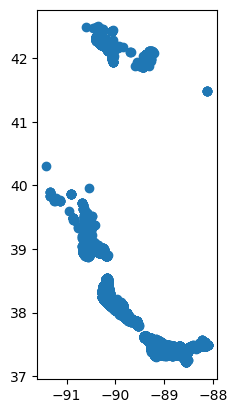

In [38]:
sink_pts = gpd.read_file('/home/mcoving/Dropbox/sync/projects/Dolines/Illinois-sinkhole-points/Illinois_Sinkhole_Points.shp')
sink_pts.plot()

In [91]:
sink_polys = gpd.read_file('test_huc_sinks.shp')
sink_polys.geometry = sink_polys.make_valid().values
sink_polys = sink_polys.explode(ignore_index=True)

In [92]:
sink_polys

,FID,VALUE,geometry
0,1,76.0,"POLYGON ((-90.23343 38.44056, -90.23343 38.440..."
1,1,76.0,"POLYGON ((-90.23333 38.44046, -90.23333 38.440..."
2,2,415.0,"POLYGON ((-90.23130 38.43954, -90.23130 38.439..."
3,3,131.0,"POLYGON ((-90.23296 38.43907, -90.23296 38.438..."
4,4,364.0,"POLYGON ((-90.23120 38.43759, -90.23120 38.437..."
...,...,...,...
754,514,470.0,"LINESTRING (-90.25389 38.36620, -90.25389 38.3..."
755,515,508.0,"POLYGON ((-90.25426 38.36574, -90.25426 38.365..."
756,516,512.0,"POLYGON ((-90.25343 38.36519, -90.25343 38.365..."
757,516,512.0,"POLYGON ((-90.25380 38.36528, -90.25380 38.365..."


In [93]:
is_sink_idx = []
for i, row in sink_polys.iterrows():
    its = row.geometry.intersects(sink_pts.geometry)
    if len(its[its==True]) > 0:
        is_sink_idx.append(True)
    else:
        is_sink_idx.append(False)

<AxesSubplot: >

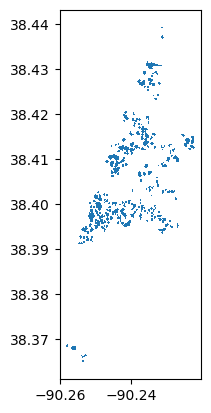

In [95]:
real_sinks = sink_polys[np.array(is_sink_idx)]
real_sinks.plot()

In [96]:
real_sinks.to_file('real_sinks.shp')

In [63]:
sink_polys.geometry = sink_polys.make_valid().values

In [45]:
import shapely


In [64]:
for i, row in sink_polys.iterrows():
    if not shapely.is_valid(row.geometry):
        print(i, 'is invalid')


In [55]:
shapely.is_valid(sink_polys.iloc[0].geometry)

#sink_polys.iloc[0].geometry = shapely.make_valid(sink_polys.iloc[0].geometry)


False

In [42]:
its = sink_polys.iloc[172].geometry.intersects(sink_pts.geometry)
its[its==True]

16763    True
Name: geometry, dtype: bool

In [41]:
sink_pts.geometry.intersects(sink_polys.iloc[172].geometry)

0        False
1        False
2        False
3        False
4        False
         ...  
21794    False
21795    False
21796    False
21797    False
21798    False
Length: 21799, dtype: bool